In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tik
import matplotlib.colors as cl
import cartopy.crs as ccrs
import cartopy as cart
from cartopy.util import add_cyclic_point
from copy import copy  
import pandas as pd
import functools
import os

In [6]:
#Functions
#1. Read in Variables

#Create Data set
fields = ["H2OSOI", "TSOI", "SOILICE",  "SNOWDP", "QDRAI_PERCH","FROST_TABLE","ZWT_PERCH",
          "ZWT",  "H2OSNO", "SNOWDP", "TSOI_10CM",  "TG", "QDRAI", "QDRAI_XS", "QICE", "QICE_MELT",
          "TBOT","TH2OSFC","THBOT","TOTEXICE_VOL","TOTSOILICE","TOTSOILLIQ","lon", "lat", "SNOW_DEPTH", "SNOW", 
          "SNOWLIQ", "FSAT", "QH2OSFC", "QOVER",  "SOILLIQ" , "TWS", "H2OSFC","FGEV" ,"FH2OSFC_NOSNOW",
          "QFLX_LIQ_GRND", "QFLX_SNOW_GRND", "QFLX_EVAP_VEG", "QSOIL", "QOVER", "QRGWL", "QSNWCPICE",
          "SNOWLIQ", "FSNO", "FSNO_EFF", "FH2OSFC",  "FSAT", "H2OSFC", "QH2OSFC", "EXCESS_ICE", "SUBSIDENCE", 
           "TG", "TSA","SUBSACC",
           "RAIN", "SNOW","QFLOOD","QIRRIG_FROM_SURFACE",'RAIN_FROM_ATM',
           "QFLX_EVAP_TOT", 'QOVER','QRGWL','QDRAI','QDRAI_PERCH',
           "NEE", "NEP", "NPP", "GPP", "TWS", "TLAI",
           "TOTCOLC", "TOTECOSYSC", "TOTSOMC", "TOTVEGC",
           "TOTCOLCH4", "CH4PROD", "CH4_SURF_DIFF_SAT", "CH4_SURF_DIFF_UNSAT", "CONC_CH4_SAT", "CONC_CH4_UNSAT",
"FCH4TOCO2", "PCH4", "PCO2", "ZWT_CH4_UNSAT"
]#, "PCT_SAND", "PCT_CLAY"


#"QTOPSOIL",
def preprocess (ds, fields):
 "Selescts varaibales, drops lndgrid"
 return ds[fields]

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')
        
path4="/cluster/work/users/estherbe/archive/0731_iskoras_spinBC_new2/lnd/hist"
path1="/cluster/work/users/estherbe/archive/0810_IStransB_acoo/lnd/hist"
path2="/cluster/work/users/estherbe/archive/0810_IStransB_acto/lnd/hist"
path3="/cluster/work/users/estherbe/archive/0810_IstransB_actT2/lnd/hist"


file= os.listdir(path1)
file_name= sorted(file)
full_paths1=[os.path.join(path1,fname) for fname in file_name]

file= os.listdir(path2)
file_name= sorted(file)
full_paths2=[os.path.join(path2,fname) for fname in file_name]

file= os.listdir(path3)
file_name= sorted(file)
full_paths3=[os.path.join(path3,fname) for fname in file_name]


file= os.listdir(path4)
file_name= sorted(file)
full_paths4=[os.path.join(path4,fname) for fname in file_name]

In [9]:
ds= xr.open_mfdataset(full_paths1, decode_times=True,           #Iskoras Transient run, short spinup
   preprocess=functools.partial(preprocess, fields=fields))

ds_2= xr.open_mfdataset(full_paths2, decode_times=True,           #Iskoras Transient run, short spinup
   preprocess=functools.partial(preprocess, fields=fields))

ds_sp= xr.open_mfdataset(full_paths4[400:460], decode_times=True,           #Iskoras Transient run, short spinup
   preprocess=functools.partial(preprocess, fields=fields))

In [12]:
ds["time"]=pd.date_range("1901-01-01", periods= 1500, freq="M")
ds_2["time"]=pd.date_range("1901-01-01", periods= 1500, freq="M")
ds_sp["time"]=pd.date_range("1901-01-01", periods= 720, freq="M")

ds_yearsu=ds.groupby(ds["time"].dt.year).sum()
ds_yearmean=ds.groupby(ds["time"].dt.year).mean()


ds=ds.assign(Frost_Table_ADJU=lambda x: x.FROST_TABLE+ x.SUBSACC)
ds=ds.assign(ZWT_PERCH_ADJU=lambda x: x.ZWT_PERCH+ x.SUBSACC)
ds.Frost_Table_ADJU[:,1]=ds.Frost_Table_ADJU[:,1]+0.5
ds.ZWT_PERCH_ADJU[:,1]=ds.ZWT_PERCH_ADJU[:,1]+0.5

levgrnd_adj=ds["levgrnd"].values+0.5
levsoi_adj=ds["levsoi"].values+0.5

ds_add=ds.assign_coords(levgrnd=("levgrnd", levgrnd_adj))
ds_add=ds_add.assign_coords(levsoi=("levsoi", levsoi_adj))

ds_year_add=ds_yearsu.assign_coords(levgrnd=("levgrnd", levgrnd_adj))
ds_year_add=ds_year_add.assign_coords(levsoi=("levsoi", levsoi_adj))


In [27]:
ds_yearsu

<xarray.Dataset>
Dimensions:              (year: 125, levsoi: 49, column: 2, levgrnd: 54,
                          lndgrid: 1, pft: 2, gridcell: 1)
Coordinates:
  * levgrnd              (levgrnd) float32 0.005 0.015 0.025 ... 25.3 35.3 45.3
  * levsoi               (levsoi) float32 0.005 0.015 0.025 ... 9.25 9.55 9.85
  * year                 (year) int64 1901 1902 1903 1904 ... 2023 2024 2025
Dimensions without coordinates: column, lndgrid, pft, gridcell
Data variables: (12/71)
    H2OSOI               (year, levsoi, column) float32 dask.array<chunksize=(1, 49, 2), meta=np.ndarray>
    TSOI                 (year, levgrnd, column) float32 dask.array<chunksize=(1, 54, 2), meta=np.ndarray>
    SOILICE              (year, levsoi, column) float32 dask.array<chunksize=(1, 49, 2), meta=np.ndarray>
    SNOWDP               (year, column) float32 dask.array<chunksize=(1, 2), meta=np.ndarray>
    QDRAI_PERCH          (year, column) float32 dask.array<chunksize=(1, 2), meta=np.ndarray>
    FROST_TABLE          (year, column) float32 dask.array<chunksize=(1, 2), meta=np.ndarray>
    ...                   ...
    CONC_CH4_SAT         (year, levgrnd, column) float32 dask.array<chunksize=(1, 54, 2), meta=np.ndarray>
    CONC_CH4_UNSAT       (year, levgrnd, column) float32 dask.array<chunksize=(1, 54, 2), meta=np.ndarray>
    FCH4TOCO2            (year, lndgrid) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    PCH4                 (year, lndgrid) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    PCO2                 (year, lndgrid) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    ZWT_CH4_UNSAT        (year, column) float32 dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes: (12/37)
    title:                                CLM History file information
    comment:                              NOTE: None of the variables are wei...
    Conventions:                          CF-1.0
    history:                              created on 08/10/24 15:18:27
    source:                               Community Terrestrial Systems Model
    hostname:                             fram
    ...                                   ...
    ctype_urban_shadewall:                73
    ctype_urban_impervious_road:          74
    ctype_urban_pervious_road:            75
    cft_c3_crop:                          1
    cft_c3_irrigated:                     2
    time_period_freq:                     month_1

In [ ]:
#ds.QDRAI_PERCH[:,0].plot(color="black")
#ds.QDRAI_PERCH[:,1].plot( color="r")

#ds_yearsu.QDRAI_PERCH[:,0].plot(color="black")
#ds_yearsu.QDRAI_PERCH[:,1].plot( color="r")

vars=["TOTVEGC", "TOTSOMC", "TOTCOLC", "TOTECOSYSC","TOTCOLCH4"]
vars=["SUBSACC","TSOI","SUBSACC"]

fig, axs= plt.subplots(2,2, layout="constrained", figsize=(16,14))

i=1
#for i in range(0,5):
    
ds[vars[i]][:,53,0].plot(color="r", x="time", ax= axs[1,0], label="pc=0.4")
ds[vars[i]][:,53,1].plot(color="r", x="time", ax= axs[1,1])

ds_2[vars[i]][:,53,0].plot(color="m", x="time", ax= axs[1,0], label="pc=0.4",linestyle="dotted")
ds_2[vars[i]][:,53,1].plot(color="m", x="time", ax= axs[1,1], linestyle="dotted")
ds_sp[vars[i]][:,53,0].plot(color="g", x="time", ax= axs[1,0], label="pc=0.4")#,linestyle="dotted")
ds_sp[vars[i]][:,53,1].plot(color="g", x="time", ax= axs[1,1])#, linestyle="dotted")


i=0
ds[vars[i]][:,0].plot(color="r", x="time", ax= axs[i,0], label="pc=0.4")
ds[vars[i]][:,1].plot(color="r", x="time", ax= axs[i,1])

ds_2[vars[i]][:,0].plot(color="m", x="time", ax= axs[i,0], label="pc=0.4",linestyle="dotted")
ds_2[vars[i]][:,1].plot(color="m", x="time", ax= axs[i,1], linestyle="dotted")
ds_sp[vars[i]][:,0].plot(color="g", x="time", ax= axs[i,0], label="pc=0.4")#,linestyle="dotted")
ds_sp[vars[i]][:,1].plot(color="g", x="time", ax= axs[i,1])#, linestyle="dotted")


vars=["TOTVEGC", "TOTSOMC", "TOTCOLC", "TOTECOSYSC","TOTCOLCH4"]

fig, axs= plt.subplots(5,2, layout="constrained", figsize=(16,14))


for i in range(0,5):

    ds[vars[i]][:,0].plot(color="r", x="time", ax= axs[i,0], label="pc=0.4")
    ds[vars[i]][:,1].plot(color="r", x="time", ax= axs[i,1])

    ds_2[vars[i]][:,0].plot(color="m", x="time", ax= axs[i,0], label="pc=0.4",linestyle="dotted")
    ds_2[vars[i]][:,1].plot(color="m", x="time", ax= axs[i,1], linestyle="dotted")
    ds_sp[vars[i]][:,0].plot(color="g", x="time", ax= axs[i,0], label="pc=0.4")#,linestyle="dotted")
    ds_sp[vars[i]][:,1].plot(color="g", x="time", ax= axs[i,1])#, linestyle="dotted")



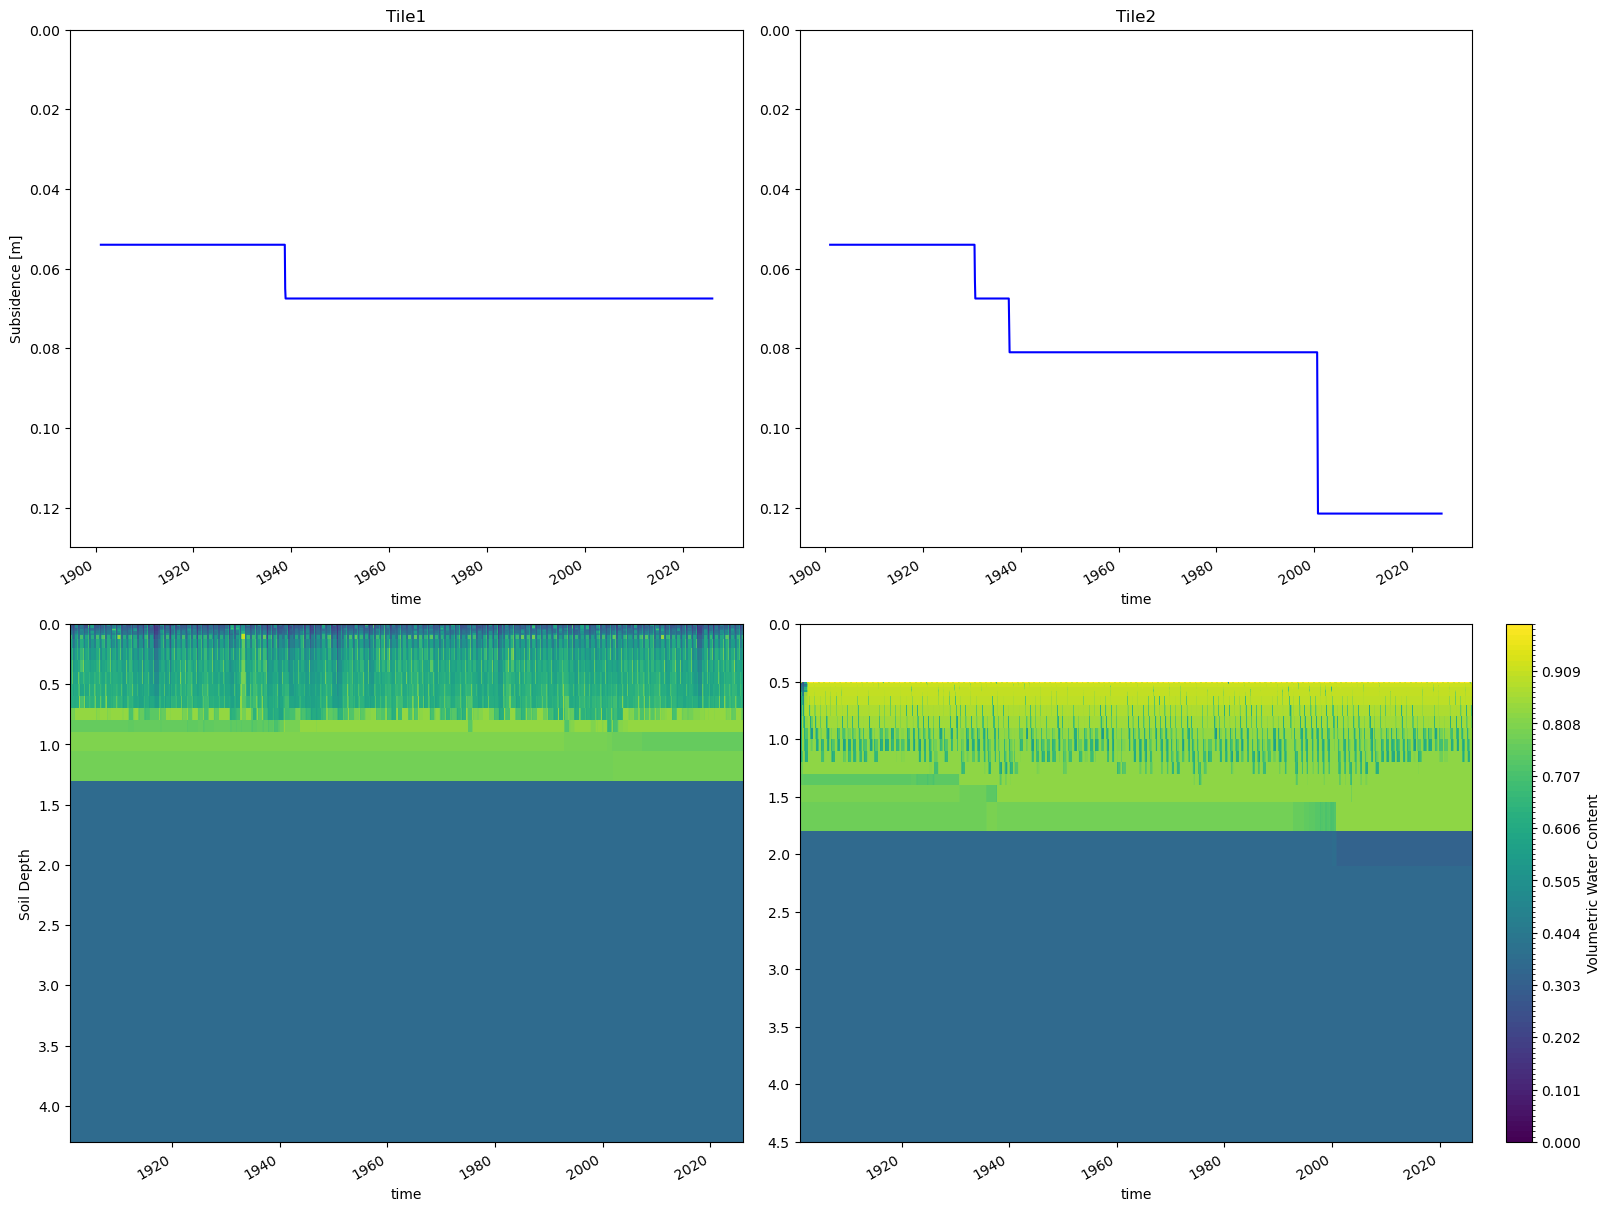

In [26]:
Vars=["SUBSACC", "FROST_TABLE","H2OSOI"]


fig, axs= plt.subplots(2,2, layout="constrained", figsize=(16,12))

ds.SUBSACC[:,0].plot(x="time", ax=axs[0,0], color="b", yincrease=False)
#axs[1,1].plot(ds_add["time"], ds_add.SUBSACC[:,1]+0.5, color="b")
ds_add.SUBSACC[:,1].plot(x="time", ax=axs[0,1], color="b", yincrease=False)

i=2

c0=ds[Vars[i]][:,0:30,0].plot( x="time", ax= axs[1,0], yincrease=False,  levels= np.linspace(0.,1.0,100), add_colorbar=False)
ds_add[Vars[i]][:,0:30,1].plot( x="time", ax= axs[1,1], yincrease=False,  levels= np.linspace(0.,1.0,100),  add_colorbar=False)
col=plt.colorbar(c0,ax=axs[1,1])
col.set_label("Volumetric Water Content")

axs[0,0].set_ylabel("Subsidence [m]")
axs[1,0].set_ylabel("Soil Depth")
axs[0,1].set_ylabel("")
axs[1,1].set_ylabel("")
axs[0,0].set_title("Tile1")
axs[0,1].set_title("Tile2")
axs[0,0].set_ylim(0.13,0.0)
axs[0,1].set_ylim(0.13,0.0)
axs[1,1].set_ylim(4.5,0.0)
axs[0,1].set_title("Tile2")

plt.savefig("Plots/Trans_SUBs.pdf", bbox_inches='tight')

In [19]:
#calculte Tsoi tempereture at TG, 9,5cm, 30cm, 1 m 
n=[9,12,19]
TSOI= ds_yearmean.TSOI[:,n,:]

TGm=np.mean(ds_yearmean.TG,axis=0)
TSm=np.mean(TSOI,axis=0)

#TGM=np.append( TSm,TGm ,axis=1)

for i in range(0,91,10):
    x=np.mean(ds_yearmean.TG[i:i+1],axis=0)
    TGm=np.append(TGm,x,axis=0)
    x=np.mean(TSOI[i:i+1],axis=0)
    TSm=np.append(TSm,x,axis=0)

TGm
TSm
#TSm.values
#x.shape


array([[271.03375, 274.45056],
       [270.59393, 273.6    ],
       [271.18243, 272.50345],
       [270.68332, 273.30807],
       [270.27588, 272.16403],
       [270.86346, 271.291  ],
       [271.50708, 274.53983],
       [270.9838 , 273.46402],
       [271.24536, 272.44156],
       [270.80756, 274.61526],
       [270.19174, 273.4407 ],
       [270.6481 , 272.11127],
       [270.35   , 274.02054],
       [270.12912, 273.2201 ],
       [271.00992, 272.56937],
       [269.33704, 272.95166],
       [269.11417, 272.12613],
       [270.49423, 271.80618],
       [270.58243, 273.34396],
       [270.31293, 272.31546],
       [270.82748, 271.78018],
       [271.95944, 274.26242],
       [271.2581 , 272.88123],
       [271.18155, 272.02518],
       [269.9224 , 274.45248],
       [269.70346, 273.5055 ],
       [270.93173, 272.6692 ],
       [270.15424, 274.63992],
       [270.1624 , 273.85605],
       [271.1582 , 272.75003],
       [272.3    , 275.04156],
       [271.70718, 274.11017],
       [

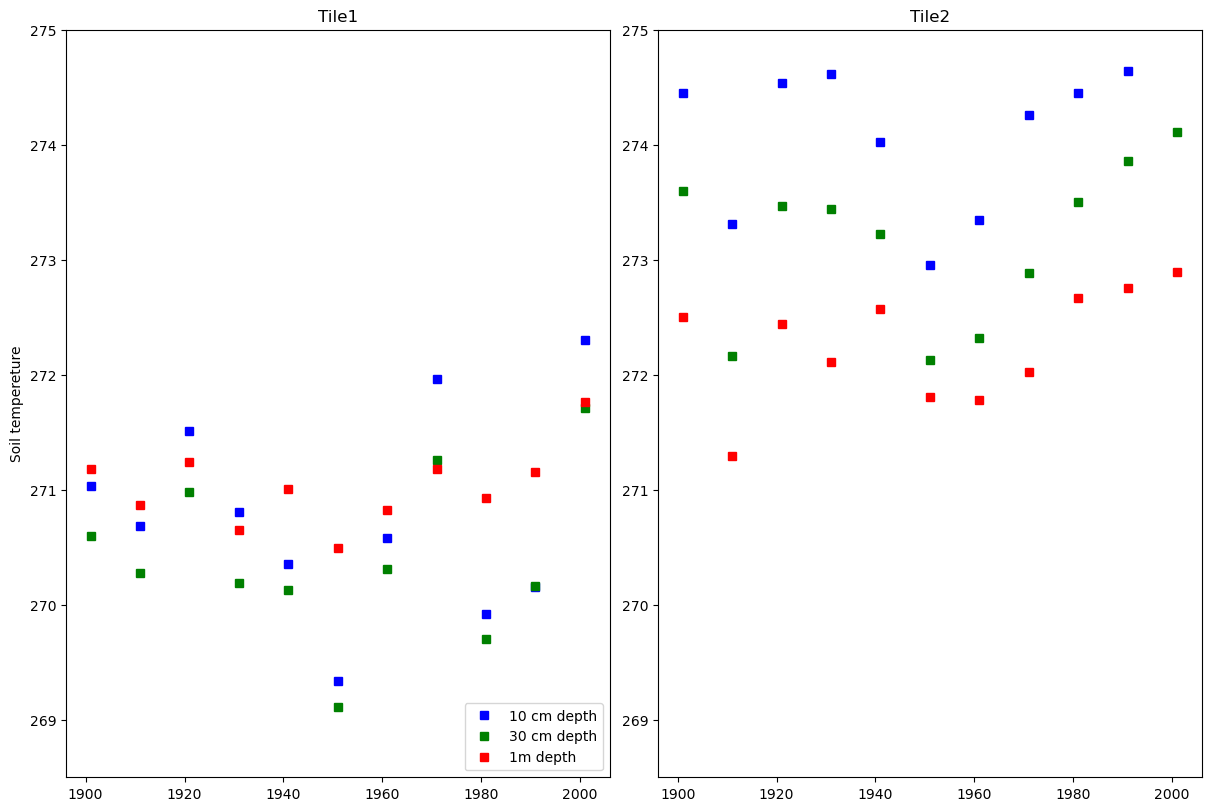

In [63]:
m=range(1901,2010,10)
n=range(0,31,3)
n1=range(1,32,3)
n2=range(2,33,3)
fig, axs= plt.subplots(1,2, layout="constrained", figsize=(12,8))

axs[0].plot(m,TSm[n,0],"bs", label="10 cm depth")
axs[1].plot(m,TSm[n,1],"bs")
axs[0].plot(m,TSm[n1,0],"gs",label="30 cm depth")
axs[1].plot(m,TSm[n1,1],"gs")
axs[0].plot(m,TSm[n2,0],"rs",label="1m depth")
axs[1].plot(m,TSm[n2,1],"rs")


axs[0].legend(loc=4)
axs[0].set_ylabel("Soil tempereture")
#axs[0].set_ylabel("Soil Depth")
axs[1].set_ylabel("")
#axs[1,1].set_ylabel("")
axs[0].set_title("Tile1")
axs[1].set_title("Tile2")
axs[0].set_ylim(268.5,275.0)
axs[1].set_ylim(268.5,275.0)
#axs[1,1].set_ylim(4.5,0.0)

plt.savefig("Plots/TSOI.pdf", bbox_inches='tight')


In [58]:
TSm.shape
vars=["TOTVEGC", "TOTSOMC", "TOTCOLC", "TOTECOSYSC","TOTCOLCH4"]
i=1
y=np.max(ds_yearsu[vars[i]][:,0]).values
y

array(515811.9, dtype=float32)

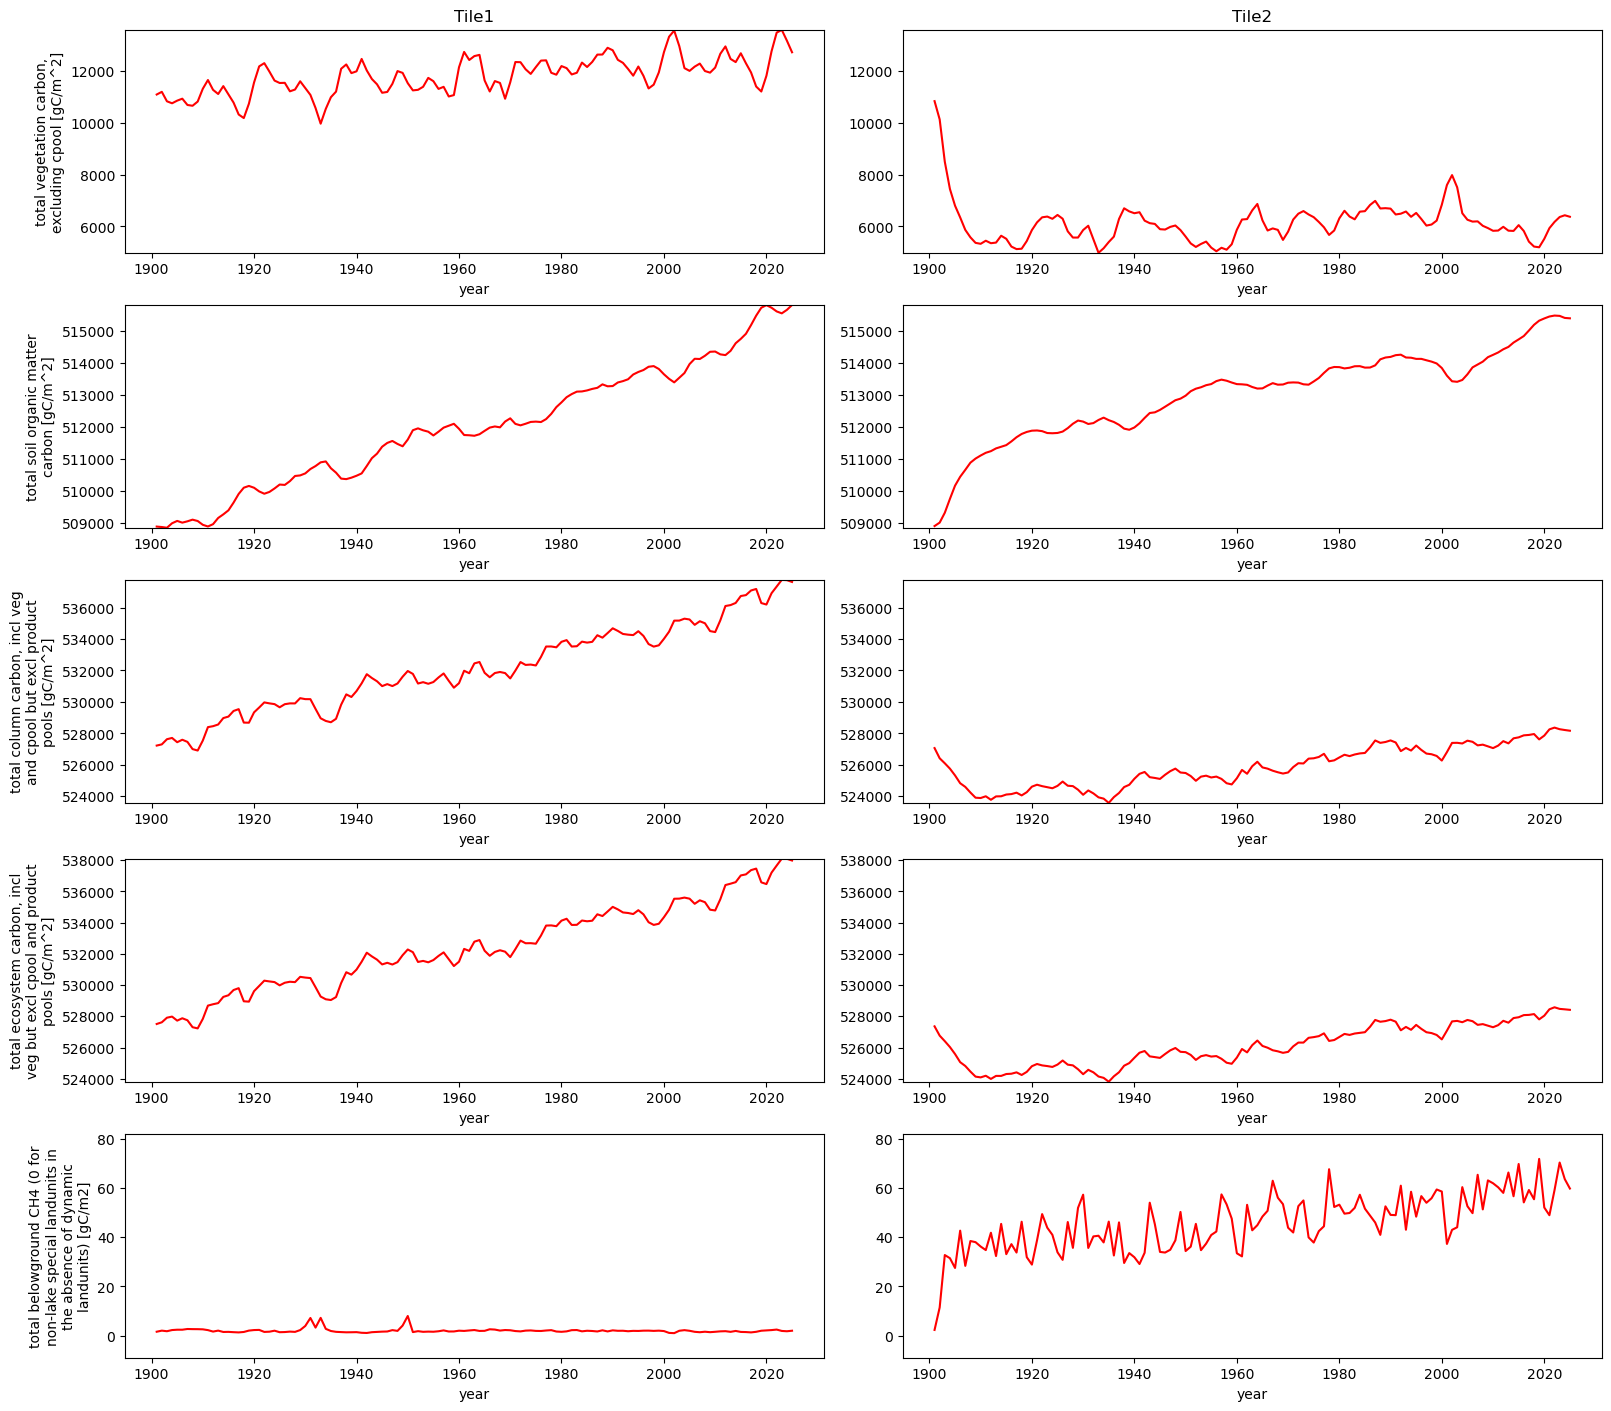

In [62]:
vars=["TOTVEGC", "TOTSOMC", "TOTCOLC", "TOTECOSYSC","TOTCOLCH4"]

#fig, axs= plt.subplots(5,2, layout="constrained", figsize=(16,14))

#for i in range(0,5):

#   ds[vars[i]][:,0].plot(color="r", x="time", ax= axs[i,0], label="pc=0.4")
#  ds[vars[i]][:,1].plot(color="r", x="time", ax= axs[i,1])

   
fig, axs= plt.subplots(5,2, layout="constrained", figsize=(16,14))


for i in range(0,5):

    ds_yearsu[vars[i]][:,0].plot(color="r",  ax= axs[i,0], label="pc=0.4")
    ds_yearsu[vars[i]][:,1].plot(color="r",  ax= axs[i,1])
    axs[i,1].set_ylabel("")
    x=np.max(ds_yearsu[vars[i]][:,])+10
    y=np.min(ds_yearsu[vars[i]][:,])-10
    axs[i,0].set_ylim(y,x)
    axs[i,1].set_ylim(y,x)
#axs[0,1].set_ylim(350,1400.0)
#axs[0,1].set_ylim(42400,275.0)

#axs[0,0].set_ylim(350,1400.0)
#axs[0,1].set_ylim(350,1400.0)
#axs[0,1].set_ylim(42400,275.0)



axs[0,0].set_title("Tile1")
axs[0,1].set_title("Tile2")
#axs[0].set_ylim(268.5,275.0)
#axs[1].set_ylim(268.5,275.0)
#axs[1,1].set_ylim(4.5,0.0)

plt.savefig("Plots/Trans_Carbon.pdf", bbox_inches='tight')

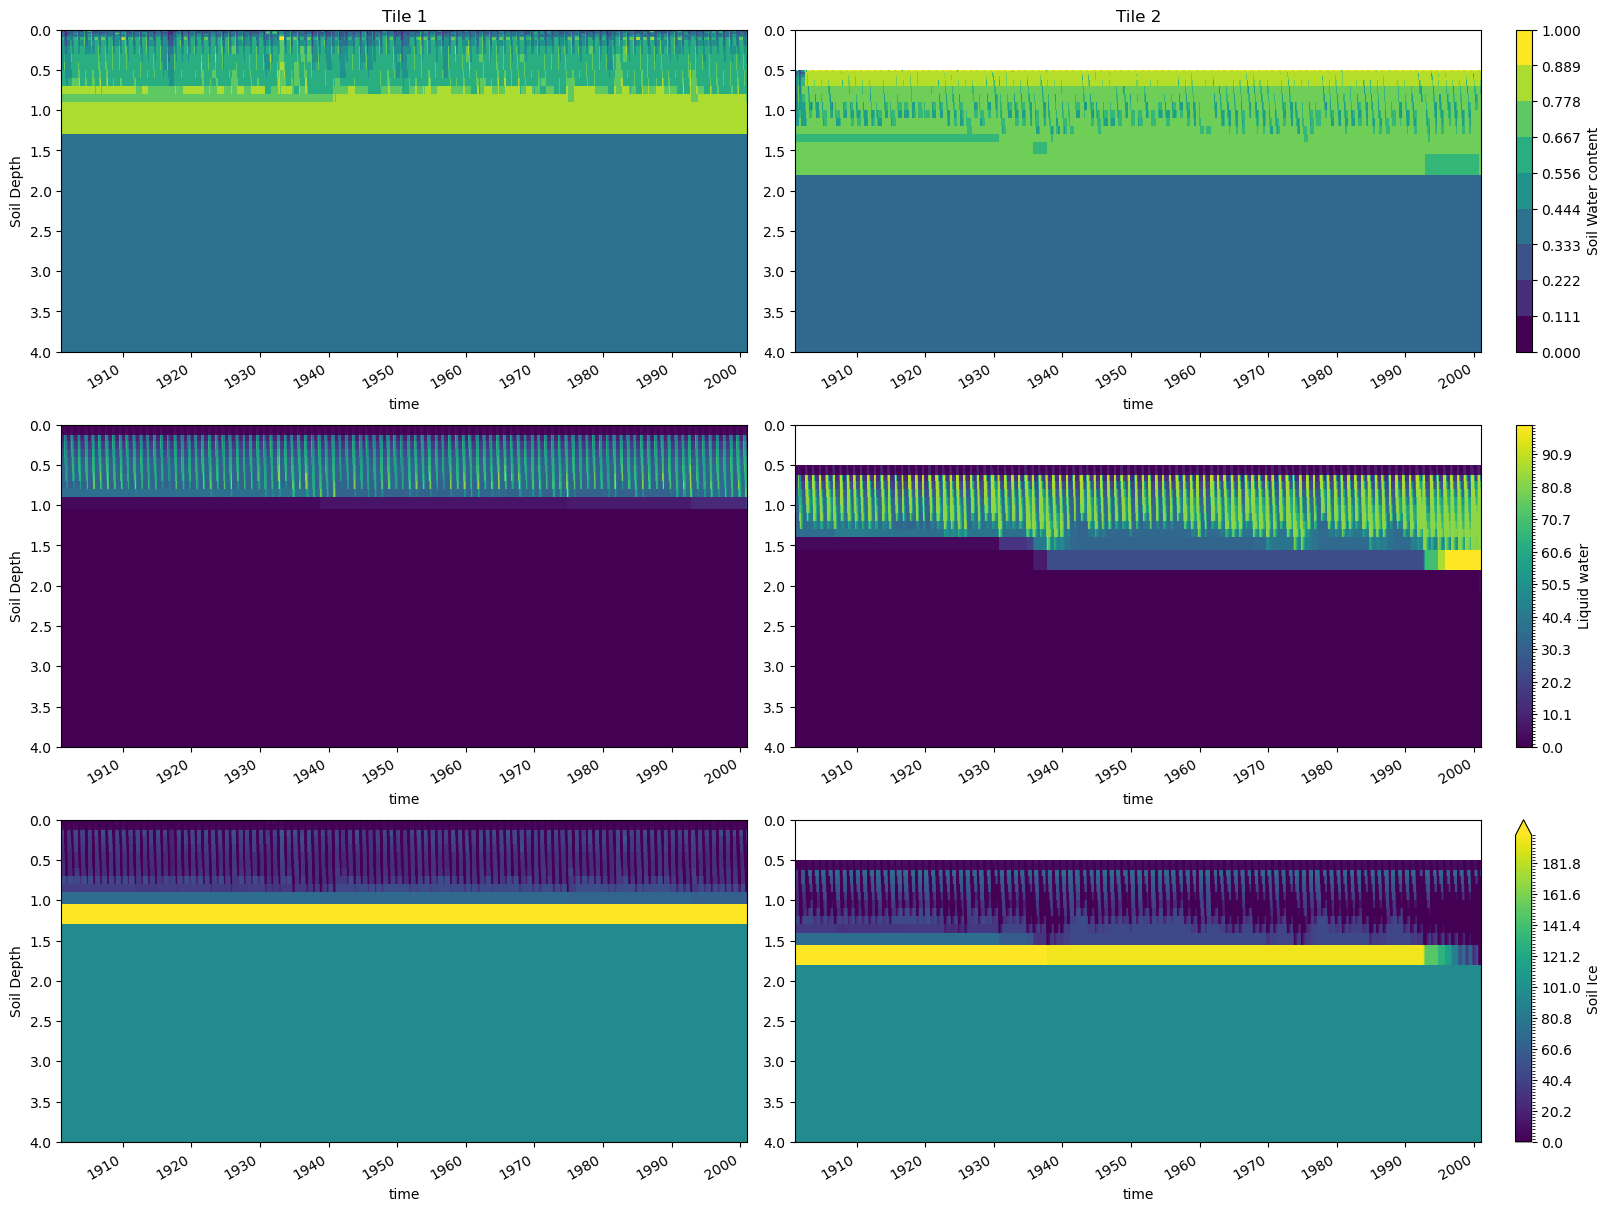

In [21]:
Vars=["H2OSOI","SOILLIQ", "SOILICE", "TSOI"]#, "EXCESS_ICE"]

fig, axs= plt.subplots(3,2, layout="constrained", figsize=(16,12))

i=0

c0=ds[Vars[0]][:,0:30,0].plot( x="time", ax= axs[0,0], yincrease=False,  levels= np.linspace(0.,1.0,10), add_colorbar=False)
ds_add[Vars[0]][:,0:30,1].plot( x="time", ax= axs[0,1], yincrease=False,  levels= np.linspace(0.,1.0,10),  add_colorbar=False)
col=plt.colorbar(c0,ax=axs[0,1])
col.set_label("Soil Water content")



c0=ds[Vars[1]][:,0:30,0].plot( x="time", ax= axs[1,0], yincrease=False,  levels= np.linspace(0.,100.0,100), add_colorbar=False)
ds_add[Vars[1]][:,0:30,1].plot( x="time", ax= axs[1,1], yincrease=False,  levels= np.linspace(0.,100.0,100),  add_colorbar=False)
col=plt.colorbar(c0,ax=axs[1,1])
col.set_label("Liquid water")



c0=ds[Vars[2]][:,0:30,0].plot( x="time", ax= axs[2,0], yincrease=False,  levels= np.linspace(0.,200.0,100), add_colorbar=False)
ds_add[Vars[2]][:,0:30,1].plot( x="time", ax= axs[2,1], yincrease=False,  levels= np.linspace(0.,200.0,100),  add_colorbar=False)
col=plt.colorbar(c0,ax=axs[2,1])
col.set_label("Soil Ice")

axs[0,0].set_title("Tile 1")
axs[0,1].set_title("Tile 2")
for i in range(0,3): 
 #ds.FROST_TABLE[:,0].plot(x="time", ax=axs[i,0], color="b")
 #ds_add.Frost_Table_ADJU[:,1].plot(x="time", ax=axs[i,1], color="b")   
 #s[i,0].legend(loc=2)
 axs[i,1].set_ylim(4.,0)   
 axs[i,0].set_ylim(4.,0)   
 axs[i,0].set_ylabel("Soil Depth")
 axs[i,1].set_ylabel("")
 
#ds_n_add.Frost_Table_ADJU[:,1].plot(x="time", ax=axs[1,1], color="b")
#ds_n.FROST_TABLE[:,0].plot(x="time", ax=axs[1,0], color="b")
 #ds.QDRAI_PERCH[:,1].plot(x="time", ax=axs[i,2], color="m")
 

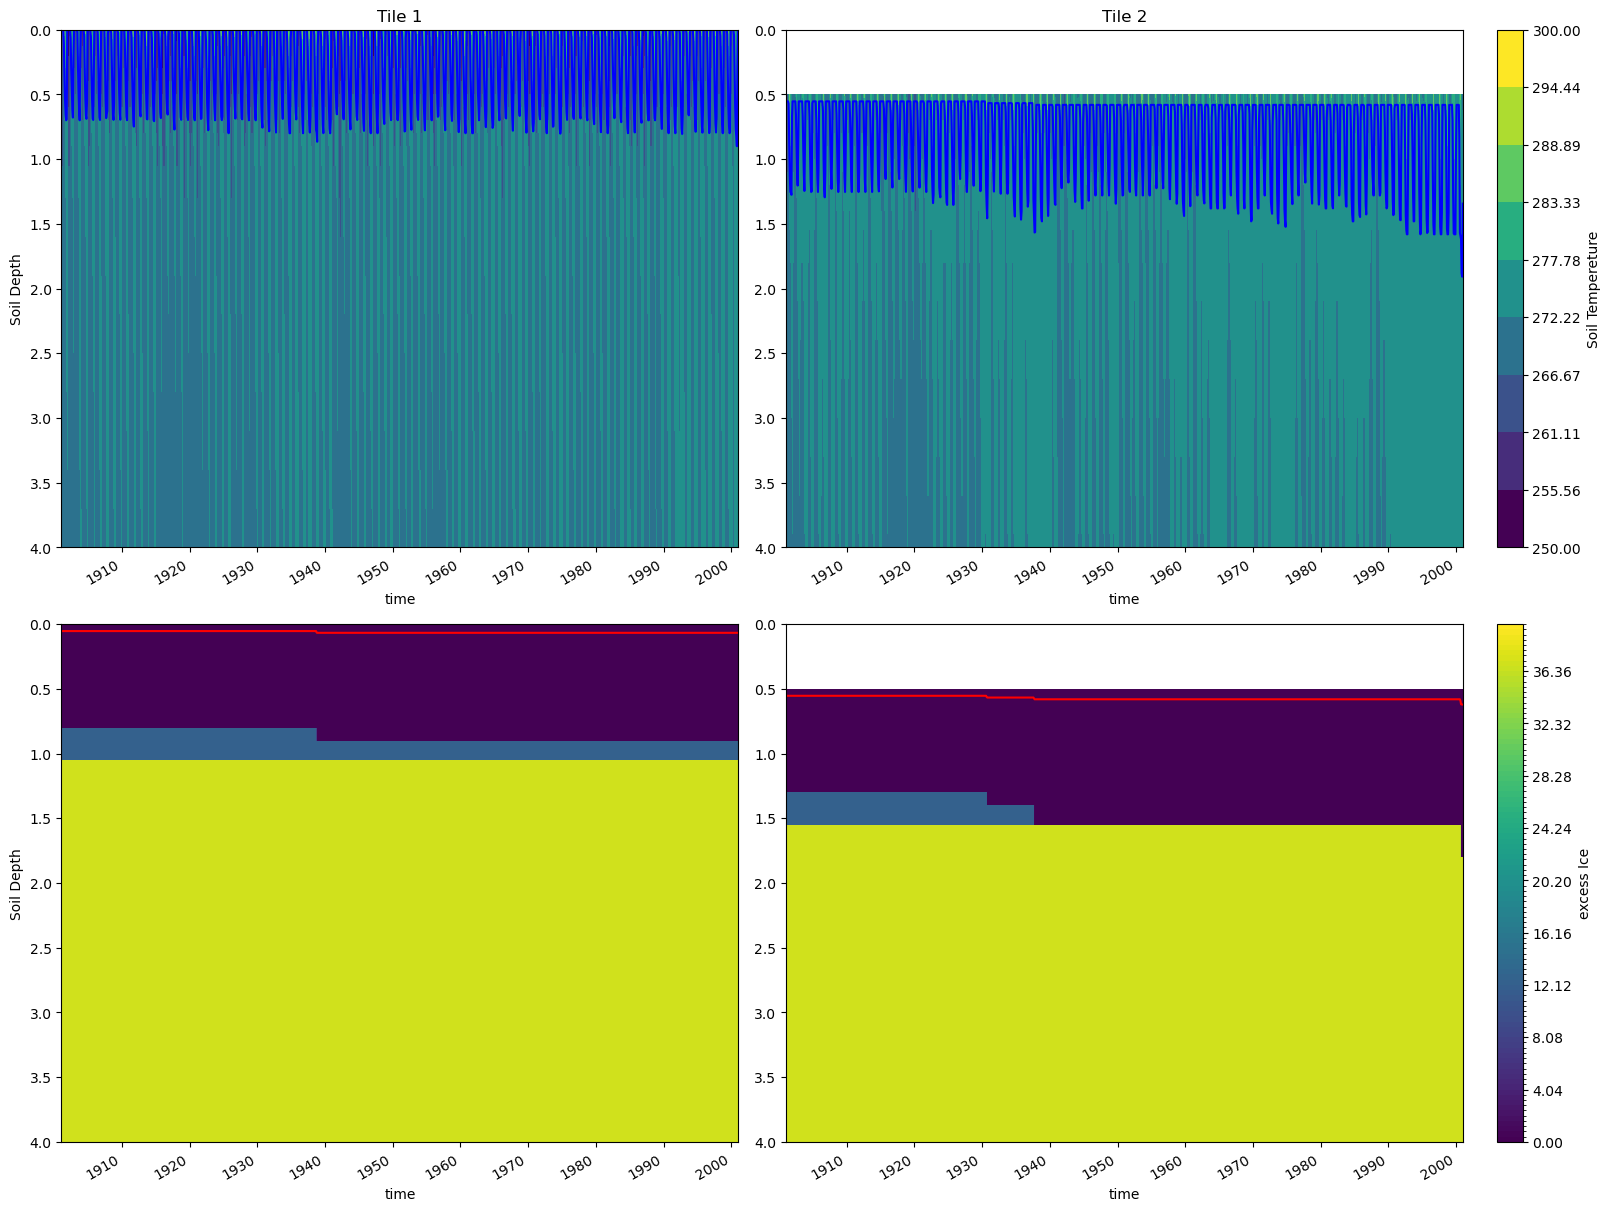

In [22]:
Vars=["TSOI", "EXCESS_ICE"]

fig, axs= plt.subplots(2,2, layout="constrained", figsize=(16,12))

i=0

c0=ds[Vars[0]][:,0:30,0].plot( x="time", ax= axs[0,0], yincrease=False,  levels= np.linspace(250.,300.0,10), add_colorbar=False)
ds_add[Vars[0]][:,0:30,1].plot( x="time", ax= axs[0,1], yincrease=False,  levels= np.linspace(250.,300.0,10),  add_colorbar=False)
ds.FROST_TABLE[:,0].plot(x="time", ax=axs[0,0], color="b")
ds_add.Frost_Table_ADJU[:,1].plot(x="time", ax=axs[0,1], color="b") 
col=plt.colorbar(c0,ax=axs[0,1])
col.set_label("Soil Tempereture")



c0=ds[Vars[1]][:,0:30,0].plot( x="time", ax= axs[1,0], yincrease=False,  levels= np.linspace(0.,40.0,100), add_colorbar=False)
ds_add[Vars[1]][:,0:30,1].plot( x="time", ax= axs[1,1], yincrease=False,  levels= np.linspace(0.,40.0,100),  add_colorbar=False)
ds.SUBSACC[:,0].plot(x="time", color="red", ax=axs[1,0])
axs[1,1].plot(ds_add["time"], ds_add.SUBSACC[:,1]+0.5, color="r")
#ds_add.SUBSACC[:,1].plot(x="time", color="red", ax=axs[1,1])
col=plt.colorbar(c0,ax=axs[1,1])
col.set_label("excess Ice")


axs[0,0].set_title("Tile 1")
axs[0,1].set_title("Tile 2")
for i in range(0,2): 
   
 #s[i,0].legend(loc=2)
 axs[i,1].set_ylim(4.,0)   
 axs[i,0].set_ylim(4.,0)   
 axs[i,0].set_ylabel("Soil Depth")
 axs[i,1].set_ylabel("")
 
#ds_n_add.Frost_Table_ADJU[:,1].plot(x="time", ax=axs[1,1], color="b")
#ds_n.FROST_TABLE[:,0].plot(x="time", ax=axs[1,0], color="b")
 #ds.QDRAI_PERCH[:,1].plot(x="time", ax=axs[i,2], color="m")

(0.2, 0.0)

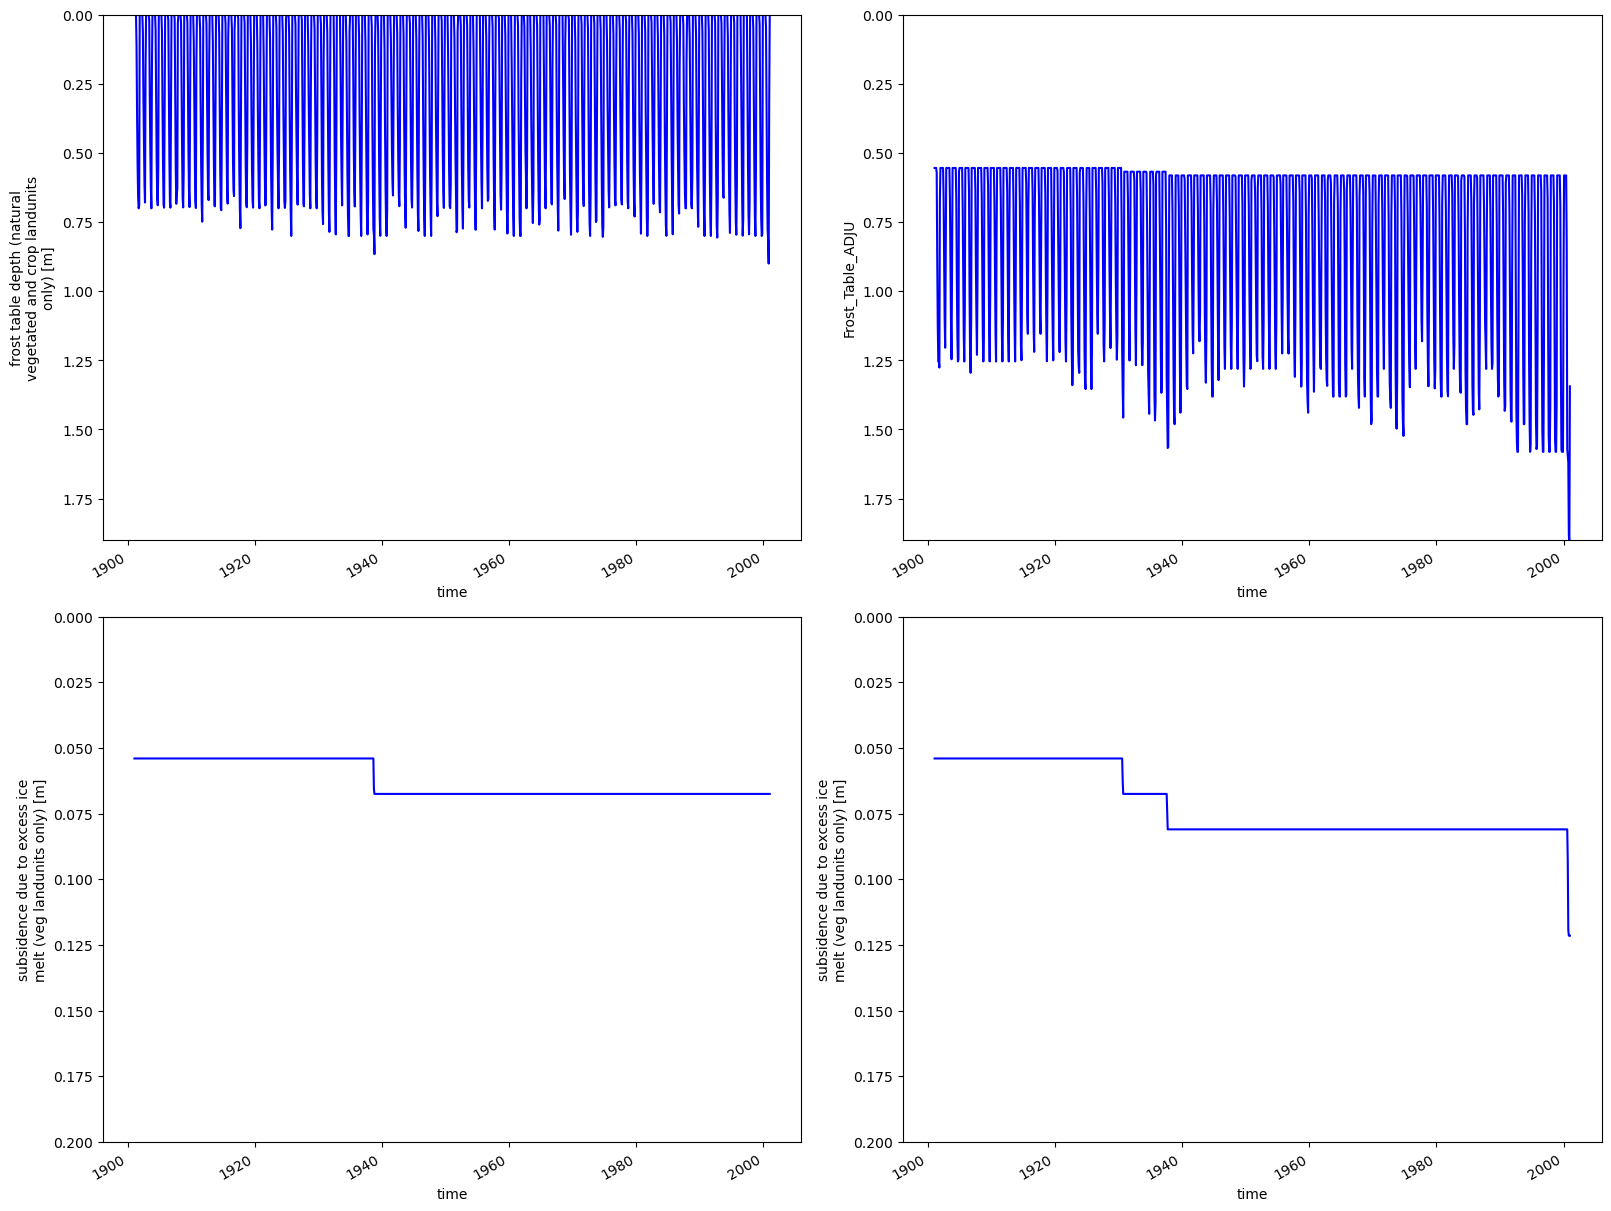

In [25]:
Vars=["TSOI", "EXCESS_ICE"]

fig, axs= plt.subplots(2,2, layout="constrained", figsize=(16,12))




#c0=ds[Vars[0]][:,0:30,0].plot( x="time", ax= axs[0,0], yincrease=False,  levels= np.linspace(250.,300.0,10), add_colorbar=False)
#ds_add[Vars[0]][:,0:30,1].plot( x="time", ax= axs[0,1], yincrease=False,  levels= np.linspace(250.,300.0,10),  add_colorbar=False)
ds.FROST_TABLE[:,0].plot(x="time", ax=axs[0,0], color="b", yincrease=False)
ds_add.Frost_Table_ADJU[:,1].plot(x="time", ax=axs[0,1], color="b", yincrease=False) 
#col=plt.colorbar(c0,ax=axs[0,1])
#col.set_label("Soil Tempereture")

ds.SUBSACC[:,0].plot(x="time", ax=axs[1,0], color="b", yincrease=False)
#axs[1,1].plot(ds_add["time"], ds_add.SUBSACC[:,1]+0.5, color="b")
ds_add.SUBSACC[:,1].plot(x="time", ax=axs[1,1], color="b", yincrease=False)

axs[0,0].set_ylim(1.9,0)
axs[0,1].set_ylim(1.9,0)
axs[1,0].set_ylim(0.2,0)
axs[1,1].set_ylim(0.2,0)

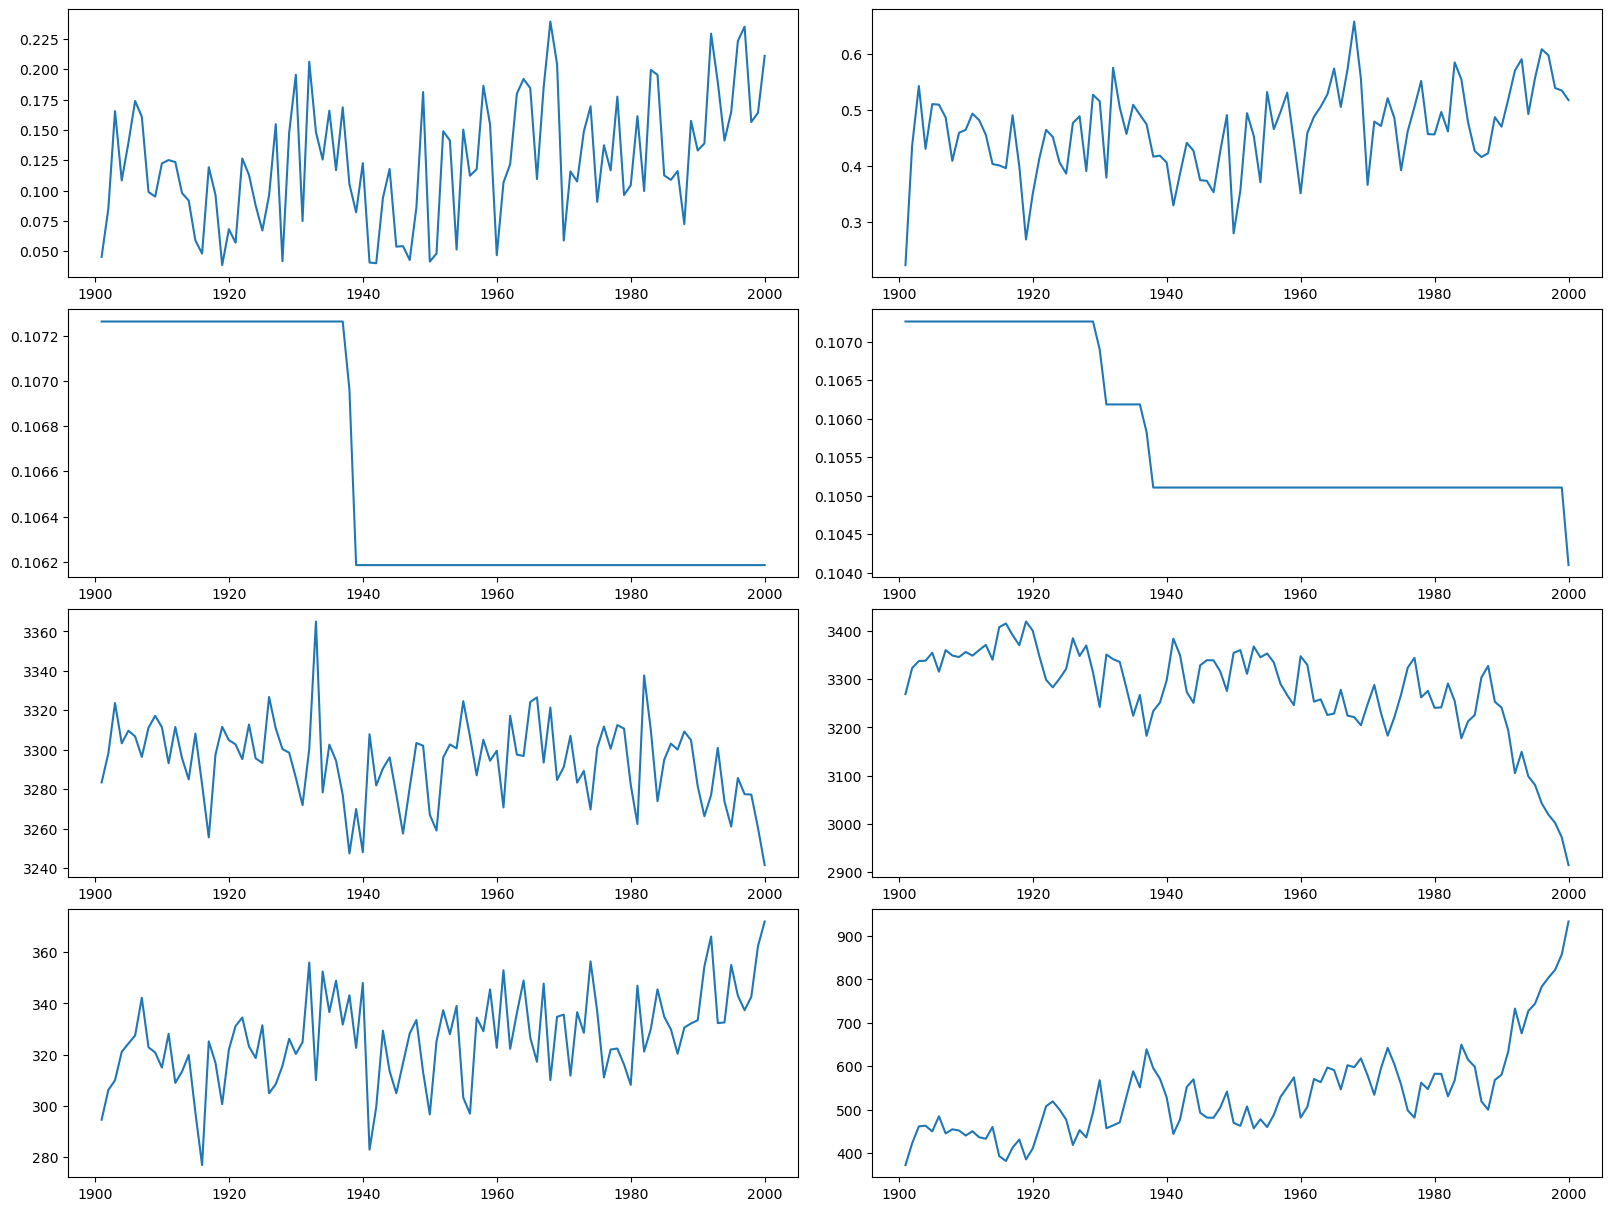

In [38]:
Vars=["SNOW_DEPTH", "TOTEXICE_VOL","TOTSOILICE","TOTSOILLIQ"]

#Vars=[ "TSOI_10CM",  "TG"]

fig, axs= plt.subplots(4,2, layout="constrained", figsize=(16,12))

x="time"
for i in range(0,4):
 axs[i,0].plot(ds_year["year"], ds_year[Vars[i]][:,0]/12)
 axs[i,1].plot(ds_year["year"], ds_year[Vars[i]][:,1]/12)



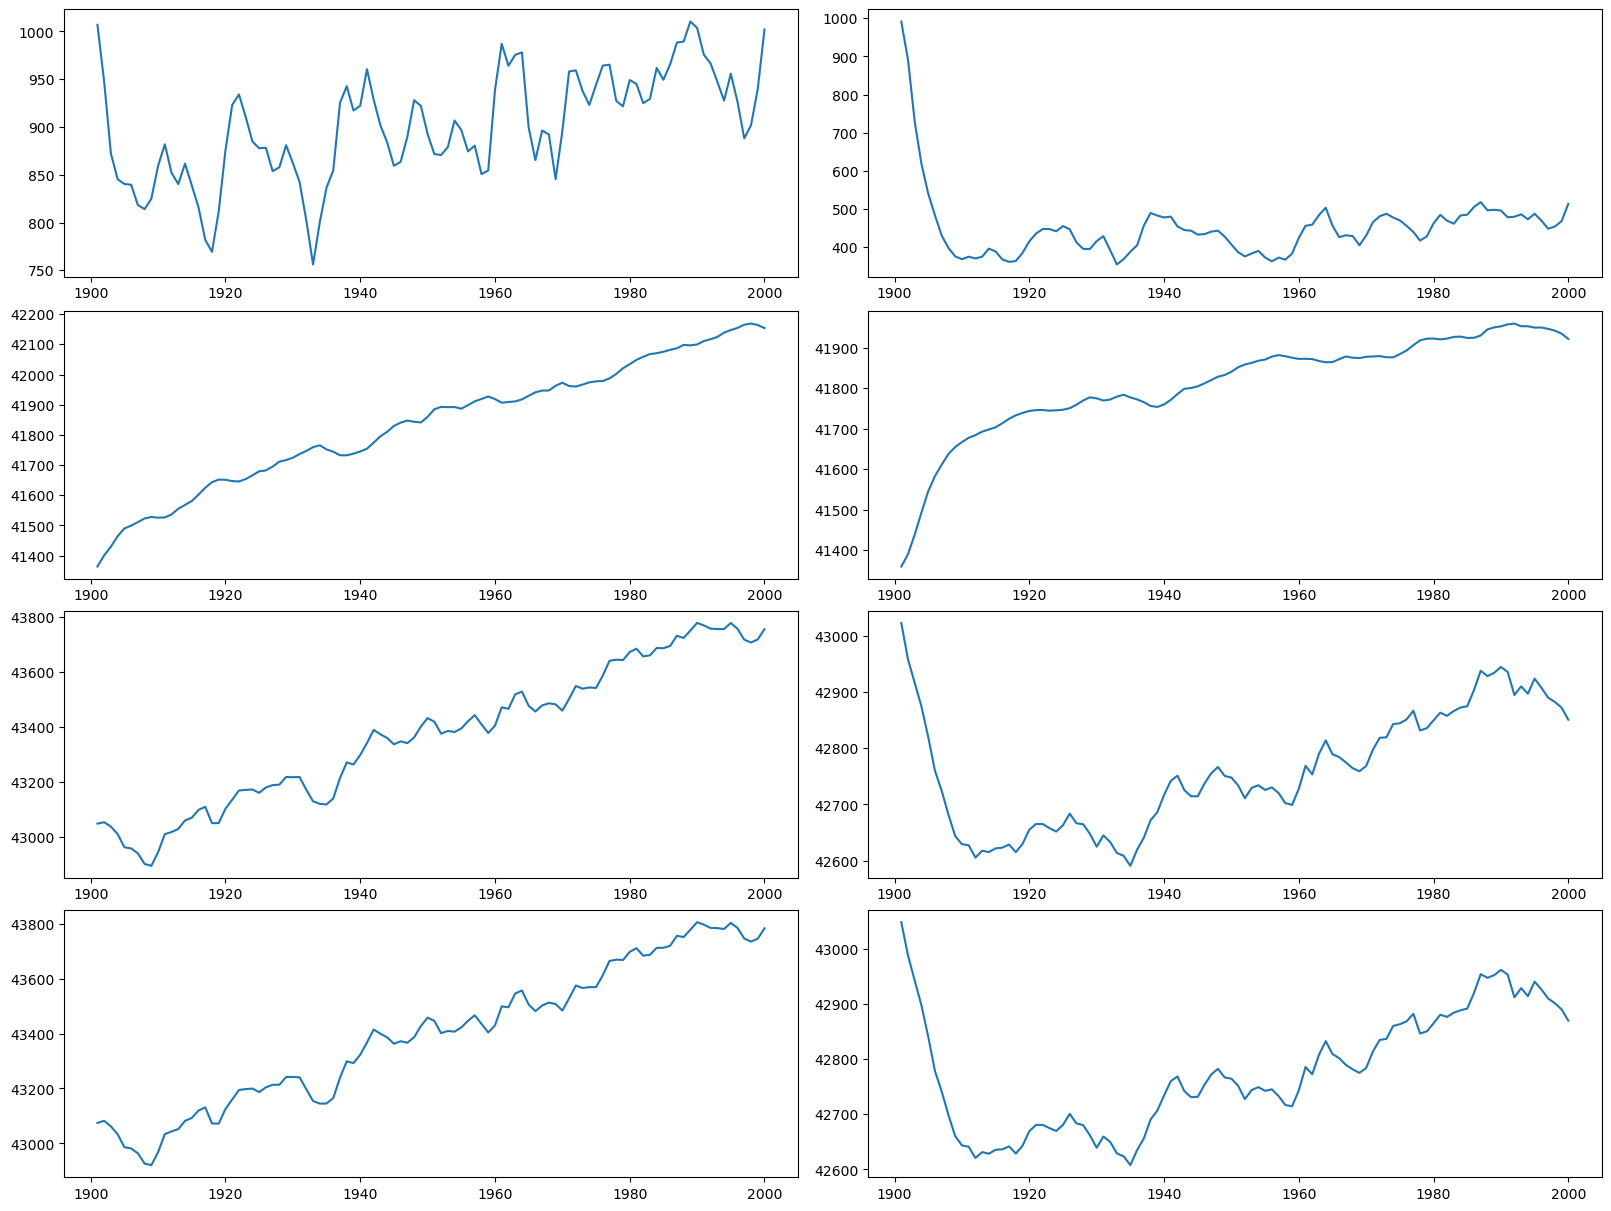

In [43]:
vars=["NEE", "NEP", "NPP", "GPP", "TWS", "TLAI",
           "TOTCOLC", "TOTECOSYSC", "TOTSOMC", "TOTVEGC",
           "TOTCOLCH4", "CH4PROD", "CH4_SURF_DIFF_SAT", "CH4_SURF_DIFF_UNSAT", "CONC_CH4_SAT", "CONC_CH4_UNSAT",
"FCH4TOCO2", "PCH4", "PCO2", "ZWT_CH4_UNSAT"]



vars=["TOTVEGC", "TOTSOMC", "TOTCOLC", "TOTECOSYSC"]
#vars=[ "CONC_CH4_SAT", "CONC_CH4_UNSAT"]
#vars=["GPP", "TLAI", "TOTVEGC"]




fig, axs= plt.subplots(4,2, layout="constrained", figsize=(16,12))


for i in range(0,4):
 axs[i,0].plot(ds_year["year"], ds_year[vars[i]][:,0]/12)
 axs[i,1].plot(ds_year["year"], ds_year[vars[i]][:,1]/12)


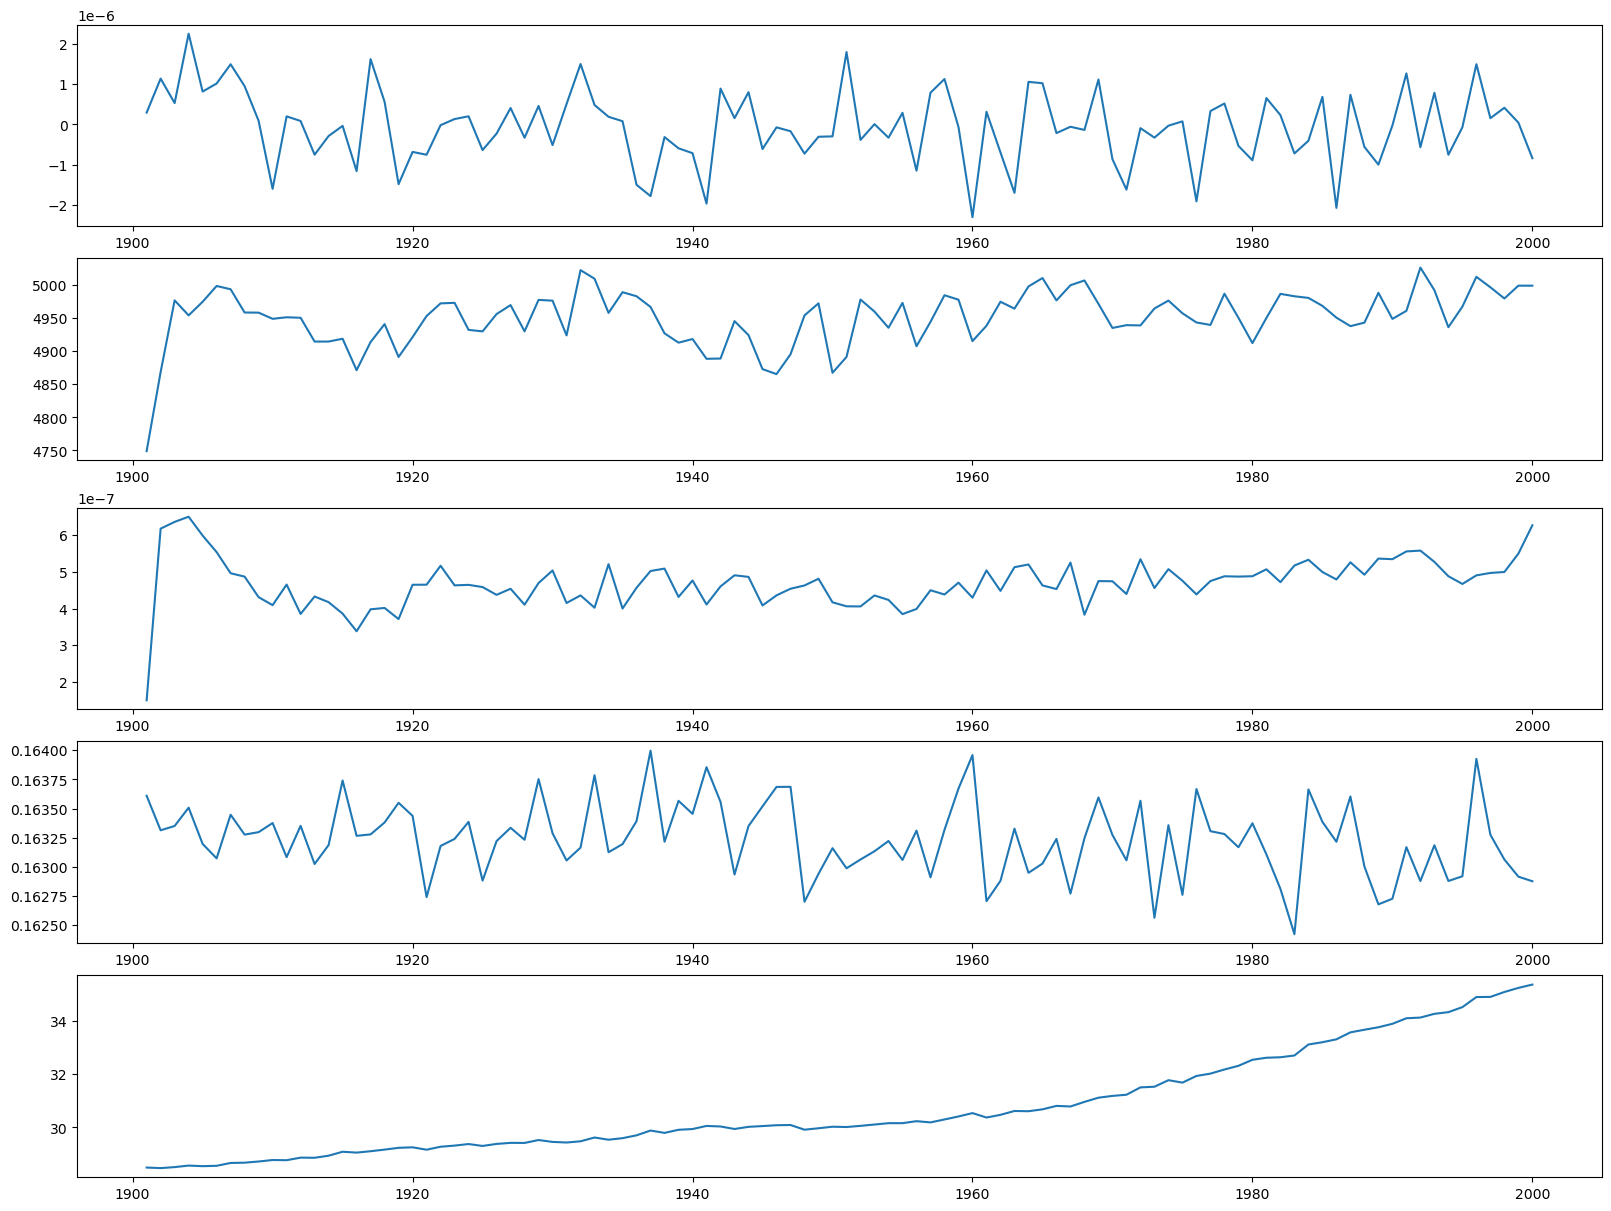

In [45]:
vars=["NEE","TWS","CH4PROD",  "PCH4", "PCO2"]



fig, axs= plt.subplots(5,1, layout="constrained", figsize=(16,12))


for i in range(0,5):
 axs[i].plot(ds_year["year"], ds_year[vars[i]][:]/12)